In [2]:
from qiskit import *
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer, execute,assemble,QuantumCircuit, aqua
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector
from qiskit.quantum_info import Statevector
from qiskit.extensions import *
provider = IBMQ.load_account()

from qiskit.quantum_info import random_unitary

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math
from math import pi, sqrt
from qiskit.circuit import Parameter

from random import seed
from random import random
import cmath


ibmqfactory.load_account:WARNING:2021-03-14 15:41:51,926: Credentials are already in use. The existing account in the session will be replaced.


In [59]:
def circuit1(qc,qr,theta,L,repeat):
    #circuit 1 
    #theta is list of the parameters
    #theta length is 8L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat


    count=0
    for l in range(L):

        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1
    
    if repeat!=0:
        qc.barrier(qr)    
    
        for l in range(L):

            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1    
     
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1
     
    return qc


def circuit2(qc,qr,theta,L,repeat):
    #circuit 2
    #theta is list of the parameters
    #theta length is 8L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat


    count=0
    for l in range(L):

        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1    
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1            
        qc.cx(qr[3],qr[2])
        qc.cx(qr[2],qr[1])
        qc.cx(qr[1],qr[0])
    
    
    if repeat!=0:    
        qc.barrier(qr)
        for l in range(L):
        
            qc.cx(qr[1],qr[0])
            qc.cx(qr[2],qr[1])
            qc.cx(qr[3],qr[2])
    
            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1         
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1                
     
    return qc




def circuit3(qc,qr,theta,L,repeat):
    #circuit 3
    #theta is list of the parameters
    #theta length is (11)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    

    count=0
    for l in range(L):

        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1    
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1            
        qc.crz(theta[count],qr[3],qr[2])
        count=count+1 
        qc.crz(theta[count],qr[2],qr[1])
        count=count+1 
        qc.crz(theta[count],qr[1],qr[0])
        count=count+1 

    if repeat!=0:           
        qc.barrier(qr)
    
        
        for l in range(L):
        
            qc.crz(theta[count],qr[1],qr[0])
            count=count+1 
            qc.crz(theta[count],qr[2],qr[1])
            count=count+1 
            qc.crz(theta[count],qr[3],qr[2])
            count=count+1 
    
            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1         
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1                
     
    return qc



def circuit4(qc,qr,theta,L,repeat):
    #circuit 4
    #theta is list of the parameters
    #theta length is (11)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat
    

    count=0
    for l in range(L):

        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1    
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1            
        qc.crx(theta[count],qr[3],qr[2])
        count=count+1 
        qc.crx(theta[count],qr[2],qr[1])
        count=count+1 
        qc.crx(theta[count],qr[1],qr[0])
        count=count+1 

    if repeat!=0:               
        qc.barrier(qr)
    
        
        for l in range(L):
        
            qc.crx(theta[count],qr[1],qr[0])
            count=count+1 
            qc.crx(theta[count],qr[2],qr[1])
            count=count+1 
            qc.crx(theta[count],qr[3],qr[2])
            count=count+1 
        
            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1         
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1                
     
    return qc




def circuit5(qc,qr,theta,L,repeat):
    #circuit 5
    #theta is list of the parameters
    #theta length is (28)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    


    count=0
    for l in range(L):

        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1    
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1            

            
        for j in range(4):
            for i in range(4):
                if i!=j:
                    qc.crz(theta[count],qr[3-j],qr[3-i])
                    count=count+1

 

        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1
        
        
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1            
            
    if repeat!=0:             
        qc.barrier(qr)
    
        
        for l in range(L):
        

            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1     
        
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1
        

            for j in range(4):
                for i in range(4):
                    if i!=j:
                        qc.crz(theta[count],qr[j],qr[i])
                        count=count+1
    
            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1         
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1                
     
    return qc



def circuit6(qc,qr,theta,L,repeat):
    #circuit 6
    #theta is list of the parameters
    #theta length is (28)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    


    count=0
    for l in range(L):

        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1    
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1            

            
        for j in range(4):
            for i in range(4):
                if i!=j:
                    qc.crx(theta[count],qr[3-j],qr[3-i])
                    count=count+1

 

        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1
        
        
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1            
            
    if repeat!=0:             
        qc.barrier(qr)
    
        
        for l in range(L):
        

            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1     
        
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1
        

            for j in range(4):
                for i in range(4):
                    if i!=j:
                        qc.crx(theta[count],qr[j],qr[i])
                        count=count+1
    
            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1         
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1                
     
    return qc


def circuit7(qc,qr,theta,L,repeat):
    #circuit 7
    #theta is list of the parameters
    #theta length is (19)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    
    


    count=0
    for l in range(L):

        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1    
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1            

            
        qc.crz(theta[count],qr[1],qr[0])
        count=count+1

        qc.crz(theta[count],qr[3],qr[2])
        count=count+1



        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1
        
        
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1

        
        qc.crz(theta[count],qr[2],qr[1])    
        count=count+1
        
            
    if repeat!=0:             
        qc.barrier(qr)
    
        
        for l in range(L):
        
            qc.crz(theta[count],qr[2],qr[1])    
            count=count+1
        
            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1        
        
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1
                
        
            qc.crz(theta[count],qr[3],qr[2])
            count=count+1
        
            qc.crz(theta[count],qr[1],qr[0])
            count=count+1
        
        
        
    
            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1         
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1                
     
    return qc



def circuit8(qc,qr,theta,L,repeat):
    #circuit 8
    #theta is list of the parameters
    #theta length is (19)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    
    


    count=0
    for l in range(L):

        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1    
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1            

            
        qc.crx(theta[count],qr[1],qr[0])
        count=count+1

        qc.crx(theta[count],qr[3],qr[2])
        count=count+1



        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1
        
        
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1

        
        qc.crx(theta[count],qr[2],qr[1])    
        count=count+1
        
            
    if repeat!=0:             
        qc.barrier(qr)
    
        
        for l in range(L):
        
            qc.crx(theta[count],qr[2],qr[1])    
            count=count+1
        
            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1        
        
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1
                
        
            qc.crx(theta[count],qr[3],qr[2])
            count=count+1
        
            qc.crx(theta[count],qr[1],qr[0])
            count=count+1
        
        
        
    
            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1         
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1                
     
    return qc


def circuit9(qc,qr,theta,L,repeat):
    #circuit 9
    #theta is list of the parameters
    #theta length is (4)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    
    


    count=0
    for l in range(L):

        for i in range(4):
            qc.h(qr[i])

        qc.cz(qr[3],qr[2])
        qc.cz(qr[2],qr[1])
        qc.cz(qr[1],qr[0])
        
        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1
        
            
    if repeat!=0:             
        qc.barrier(qr)
    
        
        for l in range(L):
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1
                
            qc.cz(qr[1],qr[0]) 
            qc.cz(qr[2],qr[1])
            qc.cz(qr[3],qr[2])
            
                 
        
            for i in range(4):
                qc.h(qr[i])                  
     
    return qc







def circuit10(qc,qr,theta,L,repeat):
    #circuit 10
    #theta is list of the parameters
    #theta length is (4)L+4
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    
    


    count=0
    
    for i in range(4):
        qc.ry(theta[count],qr[i])
        count=count+1
    
    for l in range(L):

        qc.cz(qr[3],qr[2])
        qc.cz(qr[2],qr[1])
        qc.cz(qr[1],qr[0])
        qc.cz(qr[3],qr[0])



        
        for i in range(4):
            qc.ry(theta[count],qr[i])
            count=count+1

        
            
    if repeat!=0:             
        qc.barrier(qr)
        for l in range(L):
            for i in range(4):
                qc.ry(theta[count],qr[i])
                count=count+1
            
            qc.cz(qr[3],qr[0])            
            qc.cz(qr[1],qr[0])
            qc.cz(qr[2],qr[1])
            qc.cz(qr[3],qr[2])
        
        for i in range(4):
            qc.ry(theta[count],qr[i])
            count=count+1
            
                 
              
     
    return qc




def circuit11(qc,qr,theta,L,repeat):
    #circuit 11
    #theta is list of the parameters
    #theta length is (12)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    

    count=0

    for l in range(L):

        for i in range(4):
            qc.ry(theta[count],qr[i])
            count=count+1
        
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1    
    

        qc.cx(qr[1],qr[0])
        qc.cx(qr[3],qr[2])



        qc.ry(theta[count],qr[1])
        count=count+1 
        qc.ry(theta[count],qr[2])
        count=count+1 
        qc.rz(theta[count],qr[1])
        count=count+1 
        qc.rz(theta[count],qr[2])
        count=count+1 
        qc.cx(qr[2],qr[1])
        
            
    if repeat!=0:             
        qc.barrier(qr)
        for l in range(L):
            qc.cx(qr[2],qr[1])
            
            qc.rz(theta[count],qr[2])
            count=count+1 
            qc.rz(theta[count],qr[1])
            count=count+1 
            qc.ry(theta[count],qr[2])
            count=count+1 
            qc.ry(theta[count],qr[1])
            count=count+1 
        
            qc.cx(qr[3],qr[2])
            qc.cx(qr[1],qr[0])
            
            
            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1            
            
            for i in range(4):
                qc.ry(theta[count],qr[i])
                count=count+1            

                 
              
     
    return qc









def circuit12(qc,qr,theta,L,repeat):
    #circuit 12
    #theta is list of the parameters
    #theta length is (12)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    

    count=0

    for l in range(L):

        for i in range(4):
            qc.ry(theta[count],qr[i])
            count=count+1
        
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1    
    

        qc.cz(qr[1],qr[0])
        qc.cz(qr[3],qr[2])



        qc.ry(theta[count],qr[1])
        count=count+1 
        qc.ry(theta[count],qr[2])
        count=count+1 
        qc.rz(theta[count],qr[1])
        count=count+1 
        qc.rz(theta[count],qr[2])
        count=count+1 
        qc.cz(qr[2],qr[1])
        
            
    if repeat!=0:             
        qc.barrier(qr)
        for l in range(L):
            qc.cz(qr[2],qr[1])
            
            qc.rz(theta[count],qr[2])
            count=count+1 
            qc.rz(theta[count],qr[1])
            count=count+1 
            qc.ry(theta[count],qr[2])
            count=count+1 
            qc.ry(theta[count],qr[1])
            count=count+1 
        
            qc.cz(qr[3],qr[2])
            qc.cz(qr[1],qr[0])
            
            
            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1            
            
            for i in range(4):
                qc.ry(theta[count],qr[i])
                count=count+1            

                 
              
     
    return qc



def circuit13(qc,qr,theta,L,repeat):
    #circuit 13
    #theta is list of the parameters
    #theta length is (16)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    

    count=0

    for l in range(L):
        for i in range(4):
            qc.ry(theta[count],qr[i])
            count=count+1

        qc.crz(theta[count],qr[3],qr[0])
        count=count+1 
        qc.crz(theta[count],qr[2],qr[3])
        count=count+1 
        qc.crz(theta[count],qr[1],qr[2])
        count=count+1 
        qc.crz(theta[count],qr[0],qr[1])
        count=count+1 
  

        
        for i in range(4):
            qc.ry(theta[count],qr[i])
            count=count+1    


        qc.crz(theta[count],qr[3],qr[2])
        count=count+1 
        qc.crz(theta[count],qr[0],qr[3])
        count=count+1 
        qc.crz(theta[count],qr[1],qr[0])
        count=count+1 
        qc.crz(theta[count],qr[2],qr[1])
        count=count+1 

            
    if repeat!=0:             
        qc.barrier(qr)
        for l in range(L):
         
            qc.crz(theta[count],qr[2],qr[1])
            count=count+1 
            qc.crz(theta[count],qr[1],qr[0])
            count=count+1                  
            qc.crz(theta[count],qr[0],qr[3])
            count=count+1 
        
            qc.crz(theta[count],qr[3],qr[2])
            count=count+1         
        
            for i in range(4):
                qc.ry(theta[count],qr[i])
                count=count+1    

            qc.crz(theta[count],qr[0],qr[1])
            count=count+1           
            
            qc.crz(theta[count],qr[1],qr[2])
            count=count+1         
            qc.crz(theta[count],qr[2],qr[3])
            count=count+1 
        
            qc.crz(theta[count],qr[3],qr[0])
            count=count+1         
        
            for i in range(4):
                qc.ry(theta[count],qr[i])
                count=count+1
            
            
    return qc




def circuit14(qc,qr,theta,L,repeat):
    #circuit 13
    #theta is list of the parameters
    #theta length is (16)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    

    count=0

    for l in range(L):
        for i in range(4):
            qc.ry(theta[count],qr[i])
            count=count+1

        qc.crx(theta[count],qr[3],qr[0])
        count=count+1 
        qc.crx(theta[count],qr[2],qr[3])
        count=count+1 
        qc.crx(theta[count],qr[1],qr[2])
        count=count+1 
        qc.crx(theta[count],qr[0],qr[1])
        count=count+1 
  

        
        for i in range(4):
            qc.ry(theta[count],qr[i])
            count=count+1    


        qc.crx(theta[count],qr[3],qr[2])
        count=count+1 
        qc.crx(theta[count],qr[0],qr[3])
        count=count+1 
        qc.crx(theta[count],qr[1],qr[0])
        count=count+1 
        qc.crx(theta[count],qr[2],qr[1])
        count=count+1 

            
    if repeat!=0:             
        qc.barrier(qr)
        for l in range(L):
         
            qc.crx(theta[count],qr[2],qr[1])
            count=count+1 
            qc.crx(theta[count],qr[1],qr[0])
            count=count+1                  
            qc.crx(theta[count],qr[0],qr[3])
            count=count+1 
        
            qc.crx(theta[count],qr[3],qr[2])
            count=count+1         
        
            for i in range(4):
                qc.ry(theta[count],qr[i])
                count=count+1    

            qc.crx(theta[count],qr[0],qr[1])
            count=count+1           
            
            qc.crx(theta[count],qr[1],qr[2])
            count=count+1         
            qc.crx(theta[count],qr[2],qr[3])
            count=count+1 
        
            qc.crx(theta[count],qr[3],qr[0])
            count=count+1         
        
            for i in range(4):
                qc.ry(theta[count],qr[i])
                count=count+1
            
            
    return qc

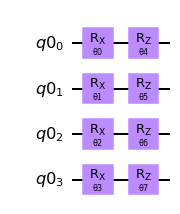

In [4]:
qr = QuantumRegister(4)
qc = QuantumCircuit(qr)

theta=[]
for i in range(62):
    theta.append((Parameter('θ'+str(i))))
qc=circuit1(qc,qr,theta,1,0)
qc.draw('mpl')

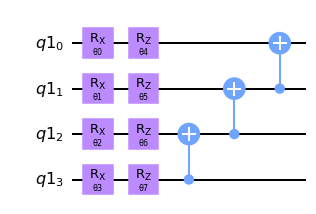

In [5]:
qr = QuantumRegister(4)
qc = QuantumCircuit(qr)

theta=[]
for i in range(62):
    theta.append((Parameter('θ'+str(i))))
circuit2(qc,qr,theta,1,0).draw('mpl')

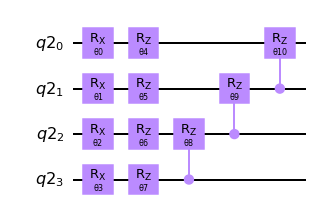

In [6]:
qr = QuantumRegister(4)
qc = QuantumCircuit(qr)

theta=[]
for i in range(62):
    theta.append((Parameter('θ'+str(i))))
circuit3(qc,qr,theta,1,0).draw('mpl')

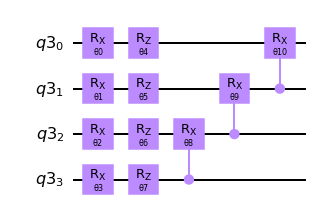

In [7]:
qr = QuantumRegister(4)
qc = QuantumCircuit(qr)

theta=[]
for i in range(62):
    theta.append((Parameter('θ'+str(i))))
circuit4(qc,qr,theta,1,0).draw('mpl')

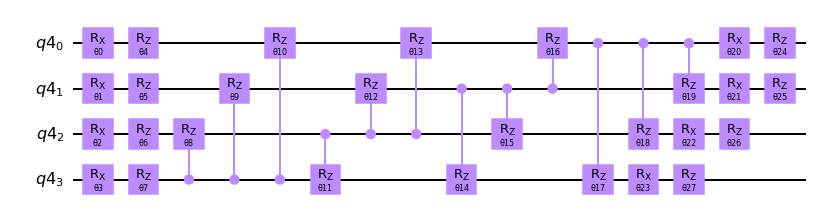

In [8]:
qr = QuantumRegister(4)
qc = QuantumCircuit(qr)

theta=[]
for i in range(62):
    theta.append((Parameter('θ'+str(i))))
circuit5(qc,qr,theta,1,0).draw('mpl')

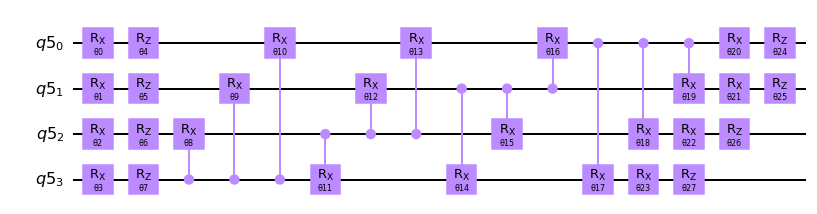

In [9]:
qr = QuantumRegister(4)
qc = QuantumCircuit(qr)


theta=[]
for i in range(62):
    theta.append((Parameter('θ'+str(i))))
circuit6(qc,qr,theta,1,0).draw('mpl')


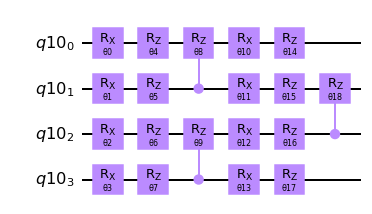

In [23]:
qr = QuantumRegister(4)
qc = QuantumCircuit(qr)


theta=[]
for i in range(62):
    theta.append((Parameter('θ'+str(i))))
circuit7(qc,qr,theta,1,0).draw('mpl')


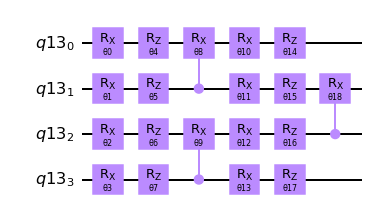

In [28]:
qr = QuantumRegister(4)
qc = QuantumCircuit(qr)


theta=[]
for i in range(62):
    theta.append((Parameter('θ'+str(i))))
circuit8(qc,qr,theta,1,0).draw('mpl')


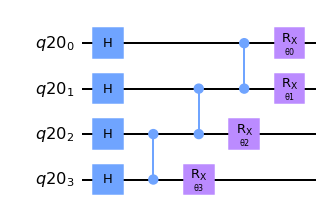

In [37]:
qr = QuantumRegister(4)
qc = QuantumCircuit(qr)


theta=[]
for i in range(62):
    theta.append((Parameter('θ'+str(i))))
circuit9(qc,qr,theta,1,0).draw('mpl')

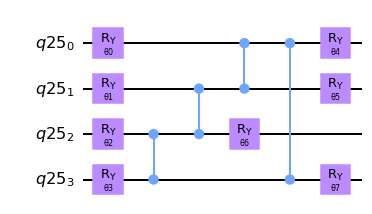

In [43]:
qr = QuantumRegister(4)
qc = QuantumCircuit(qr)


theta=[]
for i in range(62):
    theta.append((Parameter('θ'+str(i))))
circuit10(qc,qr,theta,1,0).draw('mpl')

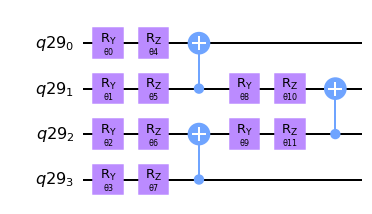

In [48]:
#circuit 11


qr = QuantumRegister(4)
qc = QuantumCircuit(qr)


theta=[]
for i in range(62):
    theta.append((Parameter('θ'+str(i))))
circuit11(qc,qr,theta,1,0).draw('mpl')

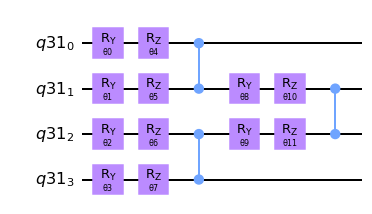

In [53]:
#circuit 12


qr = QuantumRegister(4)
qc = QuantumCircuit(qr)


theta=[]
for i in range(62):
    theta.append((Parameter('θ'+str(i))))
circuit12(qc,qr,theta,1,0).draw('mpl')

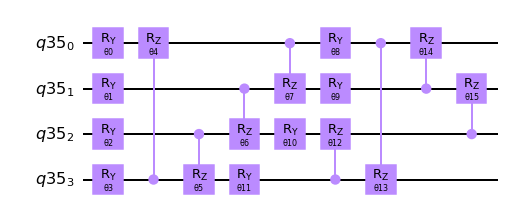

In [58]:
#circuit 13

    
qr = QuantumRegister(4)
qc = QuantumCircuit(qr)


theta=[]
for i in range(62):
    theta.append((Parameter('θ'+str(i))))
circuit13(qc,qr,theta,1,0).draw('mpl')




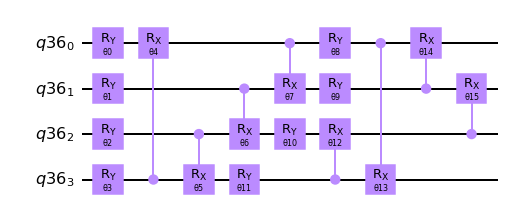

In [60]:
#circuit 14
    
qr = QuantumRegister(4)
qc = QuantumCircuit(qr)


theta=[]
for i in range(62):
    theta.append((Parameter('θ'+str(i))))
circuit14(qc,qr,theta,1,0).draw('mpl')


In [ ]:
#circuit 15

qr = QuantumRegister(4)
qc = QuantumCircuit(qr)

theta=[]
for i in range(28):
    theta.append((Parameter('θ'+str(i))))
count=0
    
for i in range(4):
    qc.ry(theta[count],qr[i])
    count=count+1

    
qc.barrier(qr)    

qc.cx(qr[3],qr[0])
count=count+1 
qc.cx(qr[2],qr[3])
count=count+1 
qc.cx(qr[1],qr[2])
count=count+1 
qc.cx(qr[0],qr[1])
count=count+1 

qc.barrier(qr)    

        
for i in range(4):
    qc.ry(theta[count],qr[i])
    count=count+1    

qc.barrier(qr)    

qc.cx(qr[3],qr[2])
count=count+1 
qc.cx(qr[0],qr[3])
count=count+1 
qc.cx(qr[1],qr[0])
count=count+1 
qc.cx(qr[2],qr[1])



qc.draw('mpl')

In [ ]:
#circuit 16

qr = QuantumRegister(4)
qc = QuantumCircuit(qr)

theta=[]
for i in range(28):
    theta.append((Parameter('θ'+str(i))))
count=0
    
for i in range(4):
    qc.rx(theta[count],qr[i])
    count=count+1
    
for i in range(4):
    qc.rz(theta[count],qr[i])
    count=count+1
    
qc.barrier(qr)    

qc.crz(theta[count],qr[1],qr[0])
count=count+1
qc.crz(theta[count],qr[3],qr[2])
count=count+1
qc.crz(theta[count],qr[2],qr[1])



qc.draw('mpl')

In [ ]:
#circuit 17

qr = QuantumRegister(4)
qc = QuantumCircuit(qr)

theta=[]
for i in range(28):
    theta.append((Parameter('θ'+str(i))))
count=0
    
for i in range(4):
    qc.rx(theta[count],qr[i])
    count=count+1
    
for i in range(4):
    qc.rz(theta[count],qr[i])
    count=count+1
    
qc.barrier(qr)    

qc.crx(theta[count],qr[1],qr[0])
count=count+1
qc.crx(theta[count],qr[3],qr[2])
count=count+1
qc.crx(theta[count],qr[2],qr[1])



qc.draw('mpl')

In [ ]:
#circuit 18

qr = QuantumRegister(4)
qc = QuantumCircuit(qr)

theta=[]
for i in range(28):
    theta.append((Parameter('θ'+str(i))))
count=0
    
for i in range(4):
    qc.rx(theta[count],qr[i])
    count=count+1
    
for i in range(4):
    qc.rz(theta[count],qr[i])
    count=count+1
    
qc.barrier(qr)    

qc.crz(theta[count],qr[3],qr[0])
count=count+1
qc.crz(theta[count],qr[2],qr[3])
count=count+1
qc.crz(theta[count],qr[1],qr[2])
count=count+1
qc.crz(theta[count],qr[0],qr[1])


qc.draw('mpl')

In [ ]:
#circuit 19

qr = QuantumRegister(4)
qc = QuantumCircuit(qr)

theta=[]
for i in range(28):
    theta.append((Parameter('θ'+str(i))))
count=0
    
for i in range(4):
    qc.rx(theta[count],qr[i])
    count=count+1
    
for i in range(4):
    qc.rz(theta[count],qr[i])
    count=count+1
    
qc.barrier(qr)    

qc.crx(theta[count],qr[3],qr[0])
count=count+1
qc.crx(theta[count],qr[2],qr[3])
count=count+1
qc.crx(theta[count],qr[1],qr[2])
count=count+1
qc.crx(theta[count],qr[0],qr[1])


qc.draw('mpl')